\usepackage[utf8]{inputenc}
\usepackage{cancel}
\usepackage{amsthm,amssymb,amsmath}
\usepackage{mathtools}

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
%matplotlib inline

In [69]:
# Load in the data from CSV
df = pd.read_csv('cc015-514-2.csv')

# Select first 3 days of data (4320 minutes)
df = df[df["Minutes"] <= 4320]

In [70]:
# Drop entries with missing data
df.dropna()

,Minutes,Date,Time,Temp,Acitivity
2,3,20/1/16,14:42:55,38.13,46.0
3,4,20/1/16,14:43:55,38.13,47.0
4,5,20/1/16,14:44:55,38.09,11.0
5,6,20/1/16,14:45:55,38.01,32.0
6,7,20/1/16,14:46:55,38.04,44.0
...,...,...,...,...,...
4315,4316,20/1/19,14:35:55,36.76,3.0
4316,4317,20/1/19,14:36:55,36.84,45.0
4317,4318,20/1/19,14:37:55,36.90,15.0
4318,4319,20/1/19,14:38:55,36.94,3.0


In [71]:
t = df["Minutes"]
y = df["Temp"]
mask = y>0

t = t[mask]
y = y[mask]


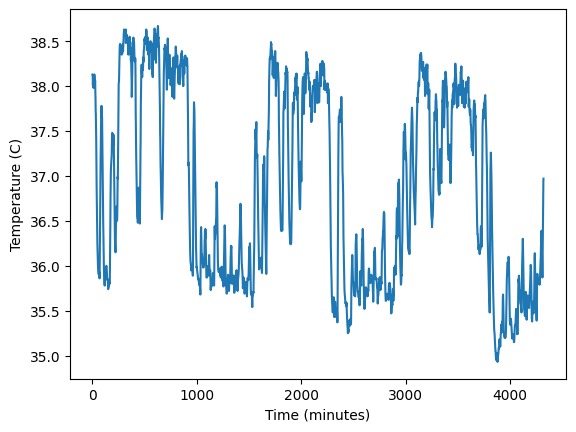

In [72]:
fig,ax = plt.subplots()
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Temperature (C)")

ax.plot(t, y, label="Temperature")

Looking at the $\textit{wavy}$ nature of the cure we will choose the following starting basis for our regressional approach.
\begin{equation*}
\{1, \sin{x}, \cos{x}\}
\end{equation*}


In [125]:
# for pandas dataframes, 
# while the variables **appear**
# as columns, internally they are rows.
# so, we need to build up the matrix in 
# rows, (vstack="vertical stack") then 
# take its transpose.
A = np.vstack([
    np.ones(t.shape), 
    t**2*np.sin(t*(2*np.pi)),
    np.cos(t*(2*np.pi))
    ])

In [148]:
A = np.vstack([np.ones(t.shape),
    np.sin(t*(2*np.pi)/1500)
    ])

In [149]:
# transpose
A = A.T

In [150]:
# least squares regression for best fit
solver_output = np.linalg.lstsq(A, y, rcond=None)
a = solver_output[0]

In [134]:
a

array([-2.14494696e+13])

In [135]:
np.dot(A, a)

array([ 1.57608146e-02,  2.10144194e-02,  2.62680243e-02, ...,
       -2.61460381e+00,  6.12494543e+01,  4.70807966e+01])

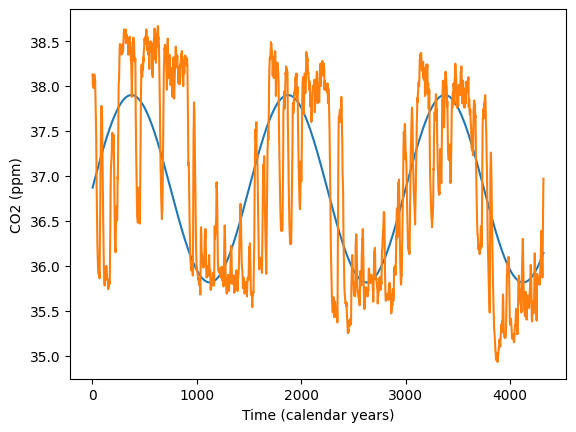

In [151]:
# plot the best fit model prediction
plt.xlabel("Time (calendar years)")
plt.ylabel("CO2 (ppm)")
plt.plot(t, np.dot(A, a))
plt.plot(t, y, label="Temperature")
